# PART 1 : Rectangle intersect

This project aims at computing intersections of two non oriented rectangles

### Import libraries

In [1]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

### The rectangle and line classes

In [2]:
class rectangle(object):
    
    def __init__(self, length, width, lower_coordinates, angle=0):
        self.length = length
        self.width = width
        self.lower_coordinates = lower_coordinates
        self.angle = angle
        
    def __repr__(self):
        return {'length':self.length, 'width':self.width, 'lower_coordinates':self.lower_coordinates, 'angle':self.angle}

    def __str__(self):
        return 'rectangle(length='+str(self.length)+', width='+str(self.width)+', lower_coordinates='+str(self.lower_coordinates)+', angle='+str(self.angle)+ ')'
    
    def compute_coordinates(self):

        if self.angle == 0 :
            self.higher_coordinates = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([self.length, self.width])])
            self.x_low_y_high = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([0, self.width])])
            self.x_high_y_low = tuple([self.lower_coordinates[i] + j for (i,j) in enumerate([self.length, 0])])
            coords = [self.lower_coordinates, self.x_low_y_high, self.x_high_y_low, self.higher_coordinates]
            return(coords)
        else:
            self.res = []
            self.coordinates_gravity_center = self.gravity_center()
            for coor in coords:
                self.res.append(tuple([self.coordinates_gravity_center[0]+\
                            (coor[0]-self.coordinates_gravity_center[0])*np.cos(degre*np.pi/180) +\
                            np.sin(degre*np.pi/180)*(self.coordinates_gravity_center[1]-coor[1]),\
                            self.coordinates_gravity_center[1]+\
                            (self.coor[0]-self.coordinates_gravity_center[0])*np.sin(degre*np.pi/180) +\
                            np.cos(degre*np.pi/180)*(-self.coordinates_gravity_center[1]+coor[1])]))
            return(self.res)
    
    def gravity_center(self):
        self.coordinates = [(self.compute_coordinates[0][0]+self.compute_coordinates[-1][0])/2,\
                            (self.compute_coordinates[0][1]+self.compute_coordinates[-1][1])/2]
        return(tuple(self.coordinates))
        
#     def rotation_rectangle(self, degre):
#         self.coordinates_gravity_center = self.gravity_center()
#         self.re = self.coordinates_gravity_center[0]+(self.lower_coordinates[0]-self.coordinates_gravity_center[0])*np.cos(degre*np.pi/180) + np.sin(degre*np.pi/180)*(self.coordinates_gravity_center[1]-self.lower_coordinates[1])
#         self.im = self.coordinates_gravity_center[1]+(self.lower_coordinates[0]-self.coordinates_gravity_center[0])*np.sin(degre*np.pi/180) + np.cos(degre*np.pi/180)*(-self.coordinates_gravity_center[1]+self.lower_coordinates[1])
#         return((self.re, self.im))
    
    def draw_manually(self, color):
        plt.plot([self.lower_coordinates[0], self.lower_coordinates[0] + self.length],\
                 [self.lower_coordinates[1], self.lower_coordinates[1]],\
                 color = color)
        plt.plot([self.lower_coordinates[0] + self.length, self.lower_coordinates[0] + self.length],\
                 [self.lower_coordinates[1], self.lower_coordinates[1] + self.width],\
                 color = color)
        plt.plot([self.lower_coordinates[0] + self.length, self.lower_coordinates[0]],\
                 [self.lower_coordinates[1] + self.width, self.lower_coordinates[1] + self.width],\
                 color = color)
        plt.plot([self.lower_coordinates[0], self.lower_coordinates[0]],\
                 [self.lower_coordinates[1] + self.width, self.lower_coordinates[1]],\
                 color = color)

    def count_points_inside(self, rectangle_2):
        self.resu1 = 0
        self.resu2 = 0
        self.coordinates1 = self.compute_coordinates()
        self.coordinates2 = rectangle_2.compute_coordinates()
        for i in range(4):           
            if ((self.coordinates1[0][0] < self.coordinates2[i][0]) & (self.coordinates1[0][1] < self.coordinates2[i][1])) &\
            ((self.coordinates1[3][0] > self.coordinates2[i][0]) & (self.coordinates1[3][1] > self.coordinates2[i][1])):
                self.resu1 += 1
            if ((self.coordinates2[0][0] < self.coordinates1[i][0]) & (self.coordinates2[0][1] < self.coordinates1[i][1])) &\
            ((self.coordinates2[3][0] > self.coordinates1[i][0]) & (self.coordinates2[3][1] > self.coordinates1[i][1])):
                self.resu2 += 1
        return(self.resu1, self.resu2)

    def is_point_inside(self, point):
        self.resu = False
        self.all_coordinates = self.compute_coordinates()
        
        if ((self.all_coordinates[0][0] < point[0]) & (self.all_coordinates[0][1] < point[1])) &\
        ((self.all_coordinates[3][0] > point[0]) & (self.all_coordinates[3][1] > point[1])):
            self.resu = True
            
        return(self.resu)
        
    def intersect(self, rectangle_2):
        
        self.all_coordinates1 = self.compute_coordinates()
        self.all_coordinates2 = rectangle_2.compute_coordinates()
        
        if self.count_points_inside(rectangle_2)[0] == 0:
            self.x = self.all_coordinates1
            self.all_coordinates1 = self.all_coordinates2
            self.all_coordinates2 = self.x
            del(self.x)
            
        if max(self.count_points_inside(rectangle_2)) == 4:
            return(0)
            
        if max(self.count_points_inside(rectangle_2)) == 2:
            if self.all_coordinates2[1][1] > self.all_coordinates1[1][1]:
                return((self.all_coordinates2[0][0] ,self.all_coordinates1[1][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[1][1] ))
            
            if self.all_coordinates2[0][1] < self.all_coordinates1[0][1]:
                return((self.all_coordinates2[0][0] ,self.all_coordinates1[0][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[0][1] ))
            
            if self.all_coordinates2[2][0] > self.all_coordinates1[2][0]:
                return((self.all_coordinates1[2][0] ,self.all_coordinates2[0][1] ),(self.all_coordinates1[2][0] ,self.all_coordinates2[1][1] ))
            
            if self.all_coordinates2[0][0] < self.all_coordinates1[0][0]:
                return((self.all_coordinates1[0][0] ,self.all_coordinates2[0][1] ),(self.all_coordinates1[0][0] ,self.all_coordinates2[1][1] ))
            
        if max(self.count_points_inside(rectangle_2)) == 1:
            if self.is_point_inside(self.all_coordinates2[0]):
                return((self.all_coordinates2[0][0] ,self.all_coordinates1[1][1] ),(self.all_coordinates1[2][0] ,self.all_coordinates2[0][1] ))
            
            if self.is_point_inside(self.all_coordinates2[1]):
                return((self.all_coordinates2[0][0] ,self.all_coordinates1[0][1] ),(self.all_coordinates1[2][0] ,self.all_coordinates2[1][1] ))
            
            if self.is_point_inside(self.all_coordinates2[2]):
                return((self.all_coordinates1[0][0] ,self.all_coordinates2[0][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[1][1] ))
            
            if self.is_point_inside(self.all_coordinates2[3]):
                return((self.all_coordinates1[0][0] ,self.all_coordinates2[1][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[0][1] ))
            
        
        if max(self.count_points_inside(rectangle_2)) == 0:
            if (((self.all_coordinates2[0][0] > self.all_coordinates1[0][0]) & (self.all_coordinates2[2][0] < self.all_coordinates1[2][0])) &\
            ((self.all_coordinates2[0][1] < self.all_coordinates1[0][1]) & (self.all_coordinates2[1][1] > self.all_coordinates1[1][1]))):
                return((self.all_coordinates2[0][0] ,self.all_coordinates1[1][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[1][1] ),\
                       (self.all_coordinates2[0][0] ,self.all_coordinates1[0][1] ),(self.all_coordinates2[2][0] ,self.all_coordinates1[0][1] ))
            
            elif (((self.all_coordinates1[0][0] > self.all_coordinates2[0][0]) & (self.all_coordinates1[2][0] < self.all_coordinates2[2][0])) &\
            ((self.all_coordinates1[0][1] < self.all_coordinates2[0][1]) & (self.all_coordinates1[1][1] > self.all_coordinates2[1][1]))):
                return((self.all_coordinates1[0][0] ,self.all_coordinates2[1][1] ),(self.all_coordinates1[2][0] ,self.all_coordinates2[1][1] ),\
                       (self.all_coordinates1[0][0] ,self.all_coordinates2[0][1] ),(self.all_coordinates1[2][0] ,self.all_coordinates2[0][1] ))
            else:
                return(0)


In [3]:
class line(object):
    
    def __init__(self, coord1, coord2):
        self.coord1 = coord1
        self.coord2 = coord2
        
    def __repr__(self):
        return {'coord1':self.coord1, 'coord2':self.coord2}

    def __str__(self):
        return 'line(coord1='+str(self.coord1)+', coord2='+str(self.coord2)+ ')'
    
    def eqn_line(self):
        
        '''
        return the cartesian equation of the line float*float : (slope, intersect)
        '''
        
        self.slope = (self.coord2[1]-self.coord1[1]) / (self.coord2[0] - self.coord1[0])
        self.intersect = self.coord2[1] - self.slope * self.coord2[0]
        
        return((np.round(self.slope,2), np.round(self.intersect,2)))

    def intersect_lines(self, line2):
        
        '''
        return the coordinates of the intersection of two lines float*float : (x,y)
        '''
        
        eqn2 = line2.eqn_line()
        if self.eqn_line()[0] == eqn2[0]:
            print('no intersect')
        else:
            self.x = np.round((eqn2[1] - self.eqn_line()[1]) / (self.eqn_line()[0] - eqn2[0]),2)
            self.y = np.round(eqn2[0] * self.x + eqn2[1],2)
            
            return((self.x,self.y))

### Simulation

In [4]:
rectan = rectangle(8,5,(1,1),0)
print(rectan.__str__())
rectan2= rectangle(11,7,(-1,2),0)
print(rectan2.__str__())

print(f'lower coordinates are: {rectan.lower_coordinates}')
print(f'all coordinates of rectan are: {rectan.compute_coordinates()}')
print(f'all coordinates of rectan are: {rectan2.compute_coordinates()}')

rectangle(length=8, width=5, lower_coordinates=(1, 1), angle=0)
rectangle(length=11, width=7, lower_coordinates=(-1, 2), angle=0)
lower coordinates are: (1, 1)
all coordinates of rectan are: [(1, 1), (1, 6), (9, 1), (9, 6)]
all coordinates of rectan are: [(-1, 2), (-1, 9), (10, 2), (10, 9)]


In [5]:
line1 = line((1,1),(9,9))
print(line1.__str__())
line2 = line((1,9),(9,1))
print(line2.__str__())

line(coord1=(1, 1), coord2=(9, 9))
line(coord1=(1, 9), coord2=(9, 1))


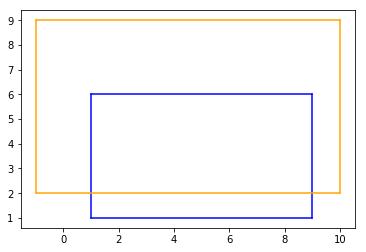

In [6]:
# draw rectangles
rectan.draw_manually('blue')
rectan2.draw_manually('orange')

In [7]:
coord_rectan = rectan.compute_coordinates()
coord_rectan2 = rectan2.compute_coordinates()

In [8]:
print(rectan.intersect(rectan2))
print(rectan.count_points_inside(rectan2))

((1, 2), (9, 2))
(0, 2)


In [9]:
print(rectan2.intersect(rectan))
print(rectan2.count_points_inside(rectan))

((1, 2), (9, 2))
(2, 0)


### Tests

In [10]:
def test_intersect(rectan, rectan2):
    
    '''
    test of intersect function
    '''
    
    rectan.draw_manually('blue')
    rectan2.draw_manually('orange')
    print(rectan.intersect(rectan2)==rectan2.intersect(rectan))
    print(rectan.intersect(rectan2))

#### Tests on condition: 2 points inside

True
((4, 0), (6, 0))
True
((4, 0), (6, 0))
True
((5, 15), (7, 15))
True
((5, 15), (7, 15))
True
((0, 5), (0, 9))
True
((0, 5), (0, 9))
True
((10, 5), (10, 9))
True
((10, 5), (10, 9))


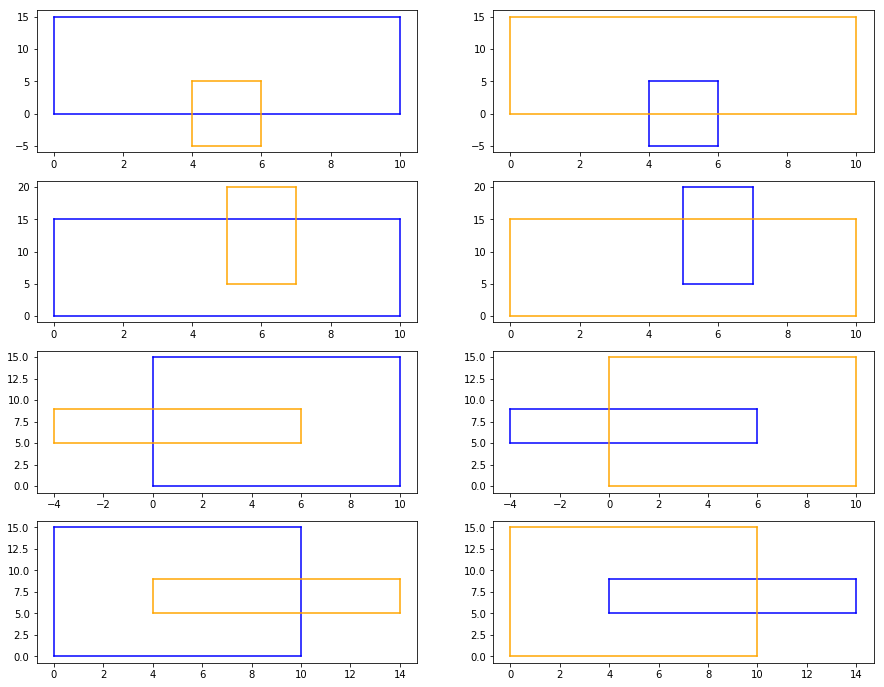

In [11]:
plt.figure(figsize=(15,12))
plt.subplot(4,2,1)
test_intersect(rectangle(10,15,(0,0),0),rectangle(2,10,(4,-5),0))
plt.subplot(4,2,2)
test_intersect(rectangle(2,10,(4,-5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,3)
test_intersect(rectangle(10,15,(0,0),0),rectangle(2,15,(5,5),0))
plt.subplot(4,2,4)
test_intersect(rectangle(2,15,(5,5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,5)
test_intersect(rectangle(10,15,(0,0),0),rectangle(10,4,(-4,5),0))
plt.subplot(4,2,6)
test_intersect(rectangle(10,4,(-4,5),0),rectangle(10,15,(0,0),0))
plt.subplot(4,2,7)
test_intersect(rectangle(10,15,(0,0),0),rectangle(10,4,(4,5),0))
plt.subplot(4,2,8)
test_intersect(rectangle(10,4,(4,5),0),rectangle(10,15,(0,0),0))

#### Tests on condition: 1 point inside

True
((0, 5), (1, 0))
True
((0, 5), (1, 0))
True
((0, 5), (1, 15))
True
((0, 5), (1, 15))


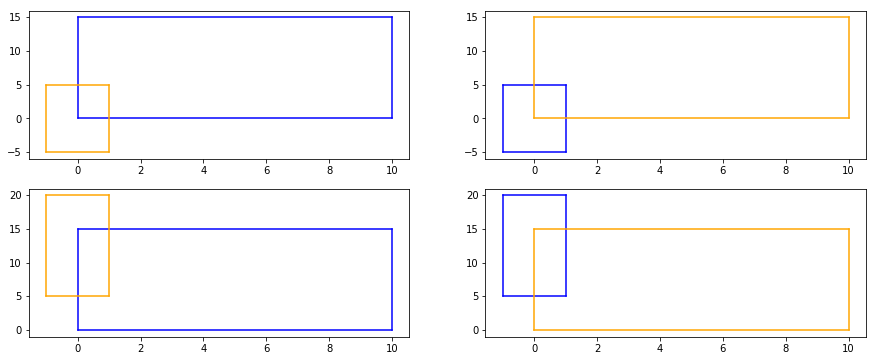

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
test_intersect(rectangle(10,15,(0,0),0),rectangle(2,10,(-1,-5),0))
plt.subplot(2,2,2)
test_intersect(rectangle(2,10,(-1,-5),0),rectangle(10,15,(0,0),0))
plt.subplot(2,2,3)
test_intersect(rectangle(10,15,(0,0),0),rectangle(2,15,(-1,5),0))
plt.subplot(2,2,4)
test_intersect(rectangle(2,15,(-1,5),0),rectangle(10,15,(0,0),0))

#### Tests on condition: 0 point inside and 4 points inside

True
((4, 15), (6, 15), (4, 0), (6, 0))
True
((4, 15), (6, 15), (4, 0), (6, 0))
True
0
True
0


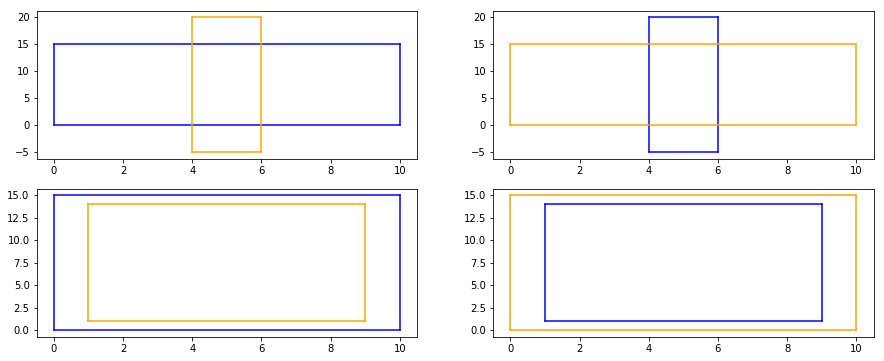

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
test_intersect(rectangle(10,15,(0,0),0),rectangle(2,25,(4,-5),0))
plt.subplot(2,2,2)
test_intersect(rectangle(2,25,(4,-5),0),rectangle(10,15,(0,0),0))
plt.subplot(2,2,3)
test_intersect(rectangle(10,15,(0,0),0),rectangle(8,13,(1,1),0))
plt.subplot(2,2,4)
test_intersect(rectangle(8,13,(1,1),0),rectangle(10,15,(0,0),0))

#### Tests on outside rectangles

True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0


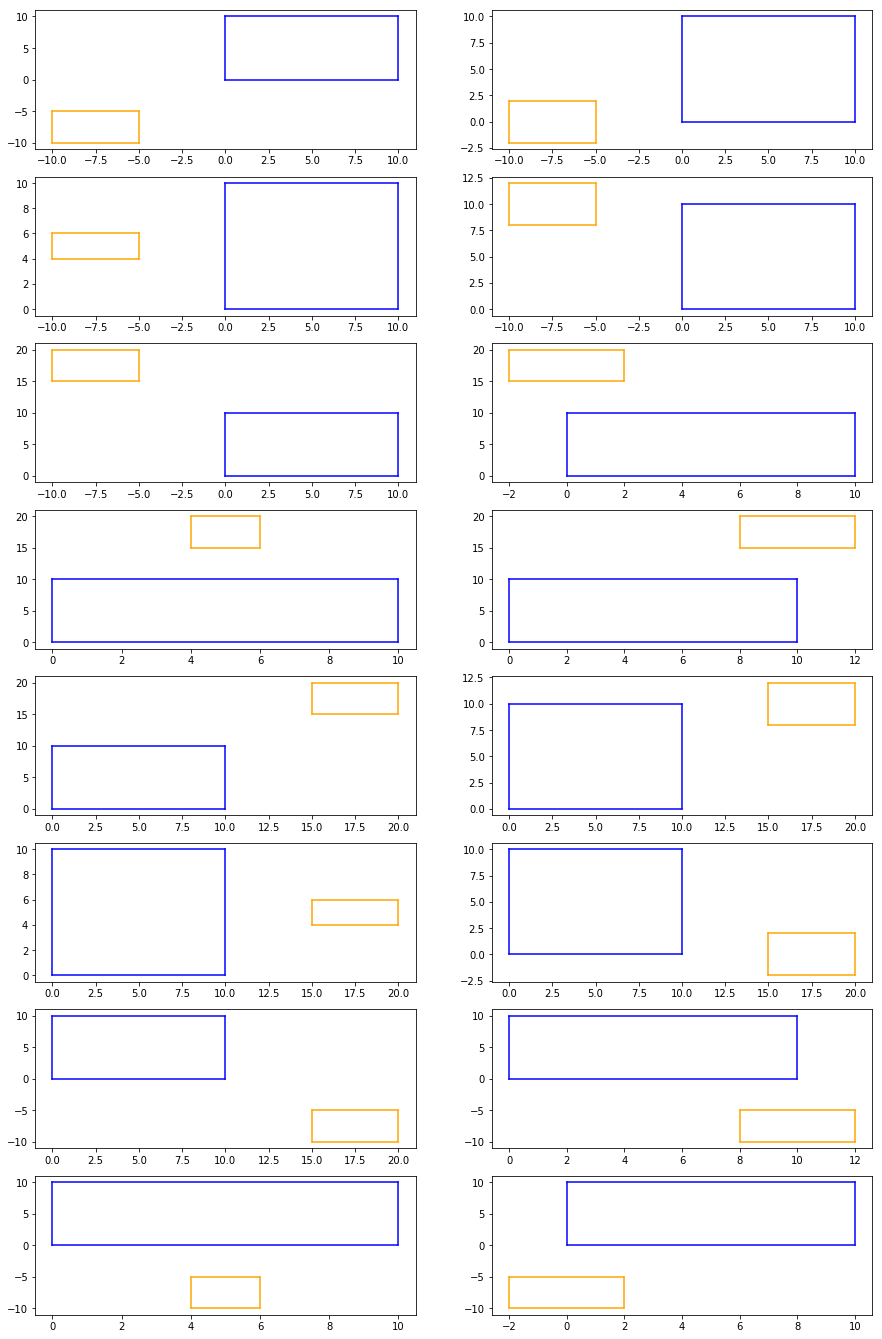

In [14]:
plt.figure(figsize=(15,24))
plt.subplot(8,2,1)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,5,(-10,-10),0))
plt.subplot(8,2,2)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,4,(-10,-2),0))
plt.subplot(8,2,3)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,2,(-10,4),0))
plt.subplot(8,2,4)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,4,(-10,8),0))
plt.subplot(8,2,5)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,5,(-10,15),0))

plt.subplot(8,2,6)
test_intersect(rectangle(10,10,(0,0),0), rectangle(4,5,(-2,15),0))
plt.subplot(8,2,7)
test_intersect(rectangle(10,10,(0,0),0), rectangle(2,5,(4,15),0))
plt.subplot(8,2,8)
test_intersect(rectangle(10,10,(0,0),0), rectangle(4,5,(8,15),0))

plt.subplot(8,2,9)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,5,(15,15),0))
plt.subplot(8,2,10)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,4,(15,8),0))
plt.subplot(8,2,11)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,2,(15,4),0))
plt.subplot(8,2,12)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,4,(15,-2),0))
plt.subplot(8,2,13)
test_intersect(rectangle(10,10,(0,0),0), rectangle(5,5,(15,-10),0))

plt.subplot(8,2,14)
test_intersect(rectangle(10,10,(0,0),0), rectangle(4,5,(8,-10),0))
plt.subplot(8,2,15)
test_intersect(rectangle(10,10,(0,0),0), rectangle(2,5,(4,-10),0))
plt.subplot(8,2,16)
test_intersect(rectangle(10,10,(0,0),0), rectangle(4,5,(-2,-10),0))